# Bifurcation
## Given:
Earth-Moon 3 body System near the L1

## Find:
a)  Plot 3D Halo. Check the periodic




In [1]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import solve_ivp
import tqdm as tq

ModuleNotFoundError: No module named 'Functions'

In [ ]:
system = "Earth-Moon"
gamma1, L1 = pn.L1_Newton(SS3.loc[system,'miu'],  0.01)

### Part a)

In [ ]:
IC = np.array([0.8233, 0,0,0, 0.1275, 0])

target = {'y_f':0, 'x_dot_f': 0, 'z_dot_f':0}
changeable = ('x_0','y_dot_0', 'z_dot_0')

z0_step = 0.001
z0_init = 0
n = 5
tf_per = 1.2
y_dot_0_vec = np.zeros((5,))
z_0_vec = np.zeros((n,))
J_c_vec = np.zeros((n,))
Per_vec = np.zeros((n,))

fig = plt.figure(figsize=(8,15))
ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')
ax1.set_proj_type('ortho')
ax2.set_proj_type('ortho')

for i, x_0 in enumerate(np.arange(z0_init, n*z0_step+z0_init, z0_step)):
    IC[2] = IC[2]+z0_step 
    t_span = [0, tf_per] 

    # Find the new orbit
    IC, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=5)
    
    t_span = [0, 2*tf_per] 
    # Plot the new orbit
    traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

    IC = IC[:6]
    
    # Log some values
    y_dot_0_vec[i] = IC[4]
    z_0_vec[i] = IC[2]
    Per_vec[i] = t_span[-1]
    J_c_vec[i] = pn.Jacobi_const(*IC[:3], v=np.linalg.norm(IC[3:6]), miu=SS3.loc[system,'miu'])

    
    ax1.plot(traj_perd.y[0,:], traj_perd.y[1,:],traj_perd.y[2,:], color = 'blue')
    ax2.plot(traj_perd.y[0,:], traj_perd.y[1,:],traj_perd.y[2,:], color = 'blue')
    
ax1.scatter(L1,0,0, marker = '+', color='blue', label='L_1')
ax1.scatter(1-SS3.loc[system, 'miu'], 0, 0, marker='o', color='grey', label='Moon')
ax1.legend()
ax1.set_title('Halo Orbits around L_1')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.set_zlabel('z-axis')

ax2.scatter(L1,0,0, marker = '+', color='blue', label='L_1')
ax2.scatter(1-SS3.loc[system, 'miu'], 0, 0, marker='o', color='grey', label='Moon')
ax2.legend()
ax2.set_title('Halo Orbits around L_1')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_zlabel('z-axis')
ax2.view_init(0, -90)

NameError: name 'np' is not defined

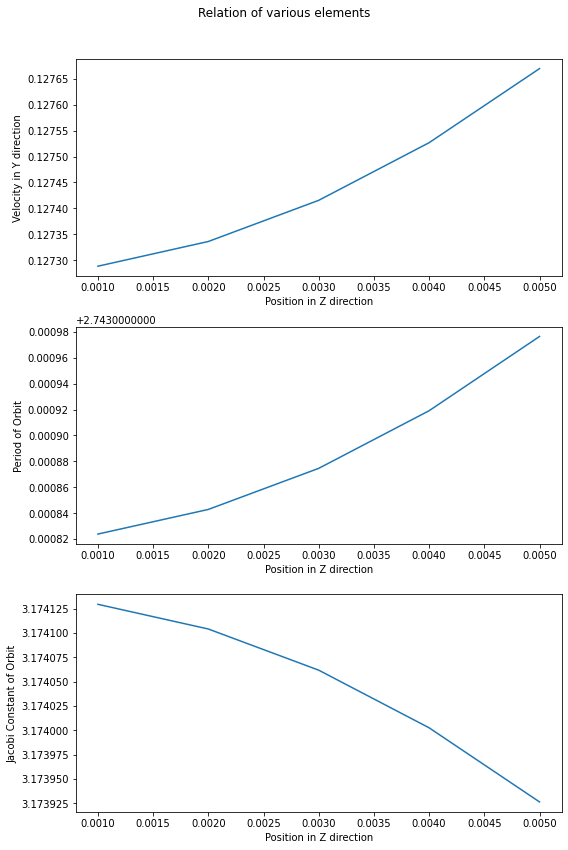

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize= (8,12))
ax = axs.ravel()

ax[0].plot(z_0_vec, y_dot_0_vec)
ax[0].set_xlabel('Position in Z direction')
ax[0].set_ylabel('Velocity in Y direction')


ax[1].plot(z_0_vec, Per_vec)
ax[1].set_xlabel('Position in Z direction')
ax[1].set_ylabel('Period of Orbit')

ax[2].plot(z_0_vec, J_c_vec)
ax[2].set_xlabel('Position in Z direction')
ax[2].set_ylabel('Jacobi Constant of Orbit')

fig.suptitle('Relation of various elements')
fig.tight_layout()
fig.subplots_adjust(top=0.92)


100%|██████████| 20/20 [01:04<00:00,  3.22s/it]


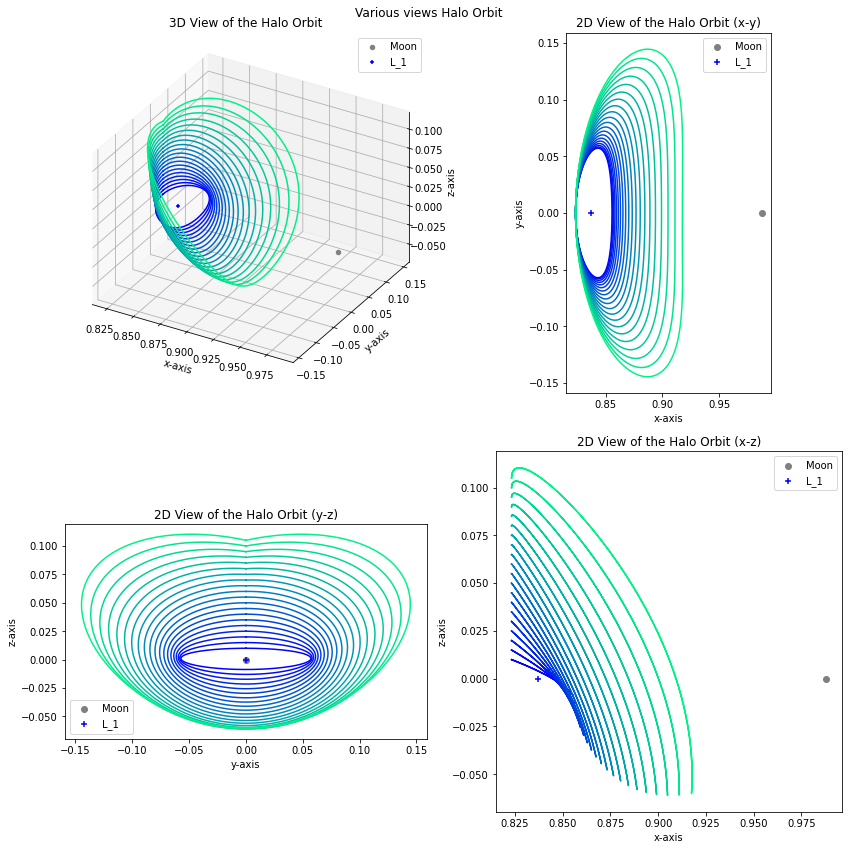

In [ ]:
n = 20

z_0_vec = np.array([z_0_vec[0], z_0_vec[-1]])
y_dot_0_vec = np.array([y_dot_0_vec[0], y_dot_0_vec[-1]])
Per_vec = np.array([Per_vec[0], Per_vec[-1]])
eig_val_vec = np.zeros((6,n), dtype=complex)
step = 0.005


cmap = cm.get_cmap('winter')
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_proj_type('ortho')

for i in tq.tqdm(range(n)):
    # Guesser
    z0 = IC[2] + step
    
    grad = (y_dot_0_vec[-1] - y_dot_0_vec[-2])/(z_0_vec[-1] - z_0_vec[-2])
    intercept = y_dot_0_vec[-1] - grad*z_0_vec[-1]
    y_dot_0 = z0 *grad + intercept
    IC = np.array([IC[0], 0, z0, 0, IC[4], 0])
    
    grad = (Per_vec[-1] - Per_vec[-2])/(z_0_vec[-1] - z_0_vec[-2])
    intercept = Per_vec[-1] - grad*z_0_vec[-1]
    tf = z0 *grad + intercept
    t_span = np.array([0, tf/2])
    
    # Find the new orbit
    IC, final_per, tf_per = pn.target(IC[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=10)
    
    t_span = [0, 2*tf_per] 
    # Plot the new orbit
    traj_perd = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu'], phi=True), t_span , IC, method='RK45',
                      rtol=10**-12, atol=10**-16)

    IC = IC[:6]
        
    # Log some values
    y_dot_0_vec = np.append(y_dot_0_vec, IC[4])
    z_0_vec = np.append(z_0_vec, IC[2])
    Per_vec = np.append(Per_vec, t_span[-1])
    
     
    
    ax1.plot(traj_perd.y[0,:], traj_perd.y[1,:], traj_perd.y[2,:], color = cmap(i/n))
    ax2.plot(traj_perd.y[0,:], traj_perd.y[1,:], color = cmap(i/n))
    ax3.plot(traj_perd.y[1,:], traj_perd.y[2,:], color = cmap(i/n))
    ax4.plot(traj_perd.y[0,:], traj_perd.y[2,:], color = cmap(i/n))


ax1.scatter(1-SS3.loc[system, 'miu'], 0, 0, marker='o', color='grey', label='Moon')
ax1.scatter(L1, 0, 0,  marker = '+', color='blue', label='L_1')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.set_zlabel('z-axis')
ax1.set_title('3D View of the Halo Orbit')
ax1.legend()

ax2.scatter(1-SS3.loc[system, 'miu'], 0, marker='o', color='grey', label='Moon')
ax2.scatter(L1, 0, marker = '+', color='blue', label='L_1')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_aspect('equal', 'box')
ax2.set_title('2D View of the Halo Orbit (x-y)')
ax2.legend()

ax3.scatter(0, 0, marker='o', color='grey', label='Moon')
ax3.scatter(0, 0, marker = '+', color='blue', label='L_1')
ax3.set_xlabel('y-axis')
ax3.set_ylabel('z-axis')
ax3.set_aspect('equal', 'box')
ax3.set_title('2D View of the Halo Orbit (y-z)')
ax3.legend()

ax4.scatter(1-SS3.loc[system, 'miu'], 0, marker='o', color='grey', label='Moon')
ax4.scatter(L1, 0, marker = '+', color='blue', label='L_1')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('z-axis')
ax4.set_aspect('equal', 'box')
ax4.set_title('2D View of the Halo Orbit (x-z)')
ax4.legend()

fig.suptitle('Various views Halo Orbit')
fig.tight_layout()
fig.subplots_adjust(top=0.95)